In [8]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [13]:
path = "D:/data-weather/data_rad/"
path_save = "D:/data-weather/data_rad_png/"
directory = os.fsencode(path)
dims = (126,201)
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    newname = filename[0:12]+filename[13:15]+".png"
    data = np.fromfile(path+filename,dtype='int16',count=-1,sep='')
    data = np.reshape(data,dims)
    data = data/30.0
    data[data >= 1.0] = 1.0
    data = data*255.0
    data = data.astype(np.uint8)
    data = np.flipud(data)
    im = Image.fromarray(data)
    im.save(path_save+newname)

In [15]:
im = Image.open("D:/data-weather/data_rad_png/rad.2017010100.png")
print(im.size)


(201, 126)


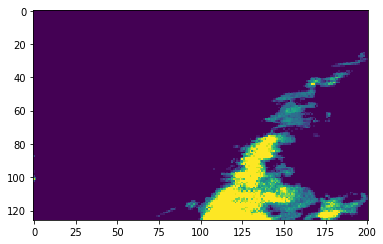

In [12]:
    data = np.fromfile("D:/data-weather/data_rad/rad.20170101.00.dat",dtype='int16',count=-1,sep='')
    data = np.reshape(data,dims)
    data = data/30.0
    data[data >= 1.0] = 1.0
    data = data*255.0
    data = data.astype(np.uint8)
    data = np.flipud(data)
    plt.imshow(data)

In [ ]:
for i in range(0,len(rad_rescaled)):
    # rescaling and capping everything to 30 mm
    rad_rescaled[i] = rad_rescaled[i]/30.0
    # since everything was divided by 30.0
    # any number greater than or equal to 1.0
    # was greater than or equal to 30.0
    # so cap it at 1.0 then multiple by 30.0 to rescale
    rad_rescaled[i][rad_rescaled[i] >= 1.0] = 1.0
    rad_rescaled[i] = rad_rescaled[i]*30.0
    rad_rescaled[i] = rad_rescaled[i].astype(np.uint8)
    print(rad_rescaled[i].max())

In [ ]:
#path = "/mnt/data-weather/final2/rad/"
#out = "/mnt/data-weather/final2/radpng/"

path = "D:/data-weather/data_rad/"
directory = os.fsencode(path)
rad_names = []
rad_data = []
dims = (126,201)
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    rad_names.append(filename)
    data = np.fromfile(path+filename,dtype='int16',count=-1,sep='')
    data = np.reshape(data,dims)
    data = data
    rad_data.append(data)

In [ ]:
print(len(rad_names))
print(len(rad_data))

In [ ]:
print(type(rad_data))
print(rad_data[0].shape)
print(rad_data[0][0][:])
print(rad_data[0].max())

In [ ]:
for item in rad_data:
    print(item.max())

In [ ]:
print(type(rad_data[0][0][0]))
rad_rescaled = rad_data.copy()
print(type(rad_rescaled[0][0][0]))

In [ ]:
print(type(rad_rescaled[0][0][0]))

In [ ]:
rad_min = 0
rad_max = 0
for i in range(0, len(rad_data)):
    print(rad_data[i].max())
    if (rad_data[i].min() <= rad_min):
        rad_min = rad_data[i].min()
    if (rad_data[i].max() >= rad_max):
        rad_max = rad_data[i].max()
        #print(rad_names[i])

In [ ]:
print(rad_min)
print(rad_max)

In [ ]:
rad_data_norm = rad_data

for i in range(0, len(rad_data_norm)):
    rad_data_norm[i] = (rad_data_norm[i]/1616.0)*255.99
print(type(rad_data_norm[0]))

In [ ]:
print(type(rad_data_norm[0][0][0]))
new_max = 0
for array in rad_data_norm:
    #print(array.max())
    if (array.max() >= new_max):
        new_max = array.max()
print(new_max)